# Exploring directional spectra from CDIP data

In [1]:
%reload_ext ewdm

In [6]:
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt
from ewdm import BuoysEWDM
from ewdm.plots import plot_directional_spectrum
from ewdm.sources import CDIPDataSourceRealTime

plt.rcParams["figure.dpi"] = 120

Let's get some data from the CDIP server

In [4]:
station_id = 189
yesterday = np.datetime64('today') - np.timedelta64(1,'D')
dataset = (
    CDIPDataSourceRealTime(station_id)
    .read_dataset(time_start=yesterday)
)
dataset

<xarray.Dataset>
Dimensions:                 (time: 2304)
Coordinates:
  * time                    (time) datetime64[ns] 2024-06-26T00:00:00.187500 ...
Data variables:
    eastward_displacement   (time) float32 0.06 0.66 1.02 ... -0.67 -1.14 -1.17
    northward_displacement  (time) float32 -0.02 0.13 -0.24 ... 1.05 0.59 -0.11
    surface_elevation       (time) float32 -1.45 -1.56 -1.17 ... 1.16 0.52 -0.25
Attributes: (12/71)
    sampling_rate:                    1.28
    naming_authority:                 edu.ucsd.cdip
    keywords_vocabulary:              Global Change Master Directory (GCMD) E...
    date_created:                     2024-06-27T17:33:50Z
    date_issued:                      2024-06-27T17:33:50Z
    date_modified:                    2024-06-27T17:33:50Z
    ...                               ...
    platform_vocabulary:              http://mmisw.org/ont/ioos/platform
    platform_name:                    AUNUU, AMERICAN SAMOA BUOY - 189p1
    DODS.strlen:                      0
    DODS.dimName:                     metaStationNameLength
    DODS_EXTRA.Unlimited_Dimension:   xyzCount
    EXTRA_DIMENSION.metaBoundsCount:  2

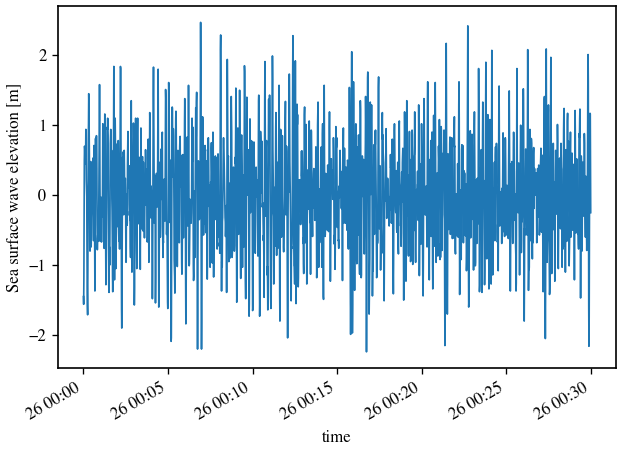

In [7]:
dataset.surface_elevation.plot()

Let's compute the directional wave spectrum using wavelet-based method.

In [30]:
spec = BuoysEWDM(dataset)
output = spec.compute(use="displacements", nvoice=64)
output

<xarray.Dataset>
Dimensions:                   (frequency: 321, direction: 72)
Coordinates:
  * frequency                 (frequency) float64 0.03125 0.03159 ... 0.9892 1.0
  * direction                 (direction) float64 -180.0 -175.0 ... 170.0 175.0
Data variables:
    directional_spectrum      (frequency, direction) float64 6.484e-06 ... 2....
    directional_distribution  (frequency, direction) float64 0.002324 ... 0.0...
    frequency_spectrum        (frequency) float64 0.00279 0.003108 ... 4.825e-06

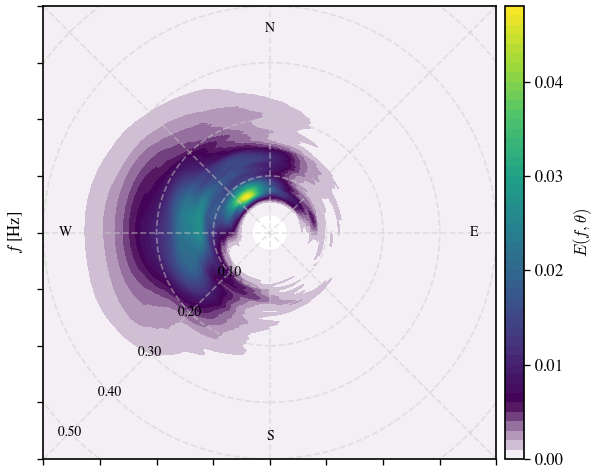

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
plot_directional_spectrum(
    output.directional_spectrum, ax=ax, dirs="direction", frqs="frequency",
    levels=50, colorbar=True, axes_kw={"rmax": 0.5, "is_period": False},
    cbar_kw={"label": "$E(f,\\theta)$"}
)

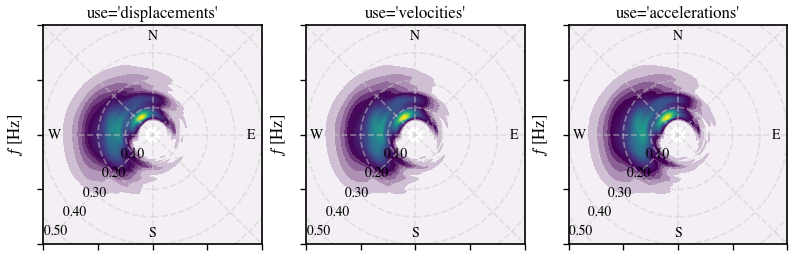

In [24]:
fig, axs = plt.subplots(1,3, figsize=(8,3))

for ax, use in zip(axs, ["displacements", "velocities", "accelerations"]):
    
    output = spec.compute(use=use)

    plot_directional_spectrum(
        output.directional_spectrum, ax=ax, dirs="direction", frqs="frequency",
        levels=50, colorbar=False, axes_kw={"rmax": 0.5, "is_period": False},
    )
    
    ax.set_title(f"use='{use}'")

Controlling the smoothness

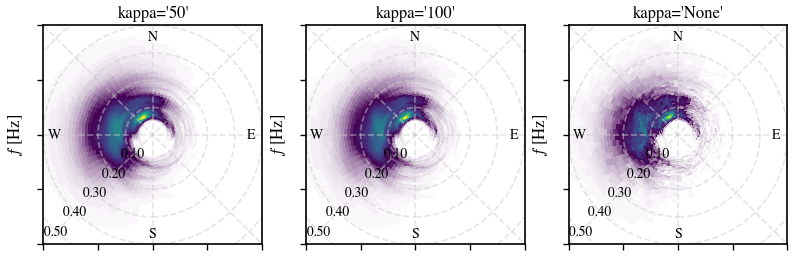

In [47]:
fig, axs = plt.subplots(1,3, figsize=(8,3))

for ax, kappa in zip(axs, [50, 100, None]):
    
    output = spec.compute(kappa=kappa)

    plot_directional_spectrum(
        output.directional_spectrum, ax=ax, dirs="direction", frqs="frequency",
        levels=None, colorbar=False, axes_kw={"rmax": 0.5, "is_period": False},
    )
    
    ax.set_title(f"kappa='{kappa}'")